In [5]:
import os
# print(os.getcwd())
import pandas as pd
import sys
sys.path.append(".")
from utils.file_parser import parse_file
from utils.llama_prompt import ask_llm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "sample_files/sample.csv" 
parsed = parse_file(file_path)

if isinstance(parsed, pd.DataFrame):
    df = parsed
    print("DataFrame Preview:")
    display(df.head())
else:
    text_data = parsed
    print("Text Preview:")
    print(text_data[:500])


DataFrame Preview:


,Order ID,Product,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date,Region
0,CA-2017-152156,Bookcase,Furniture,Bookcases,261.9600,2,0.00,41.9136,2017-11-08,West
1,CA-2017-152156,Chair,Furniture,Chairs,731.9400,3,0.00,219.5820,2017-11-08,West
2,CA-2017-138688,Label,Office Supplies,Labels,14.6200,2,0.00,6.8714,2017-06-12,Central
3,US-2016-108966,Table,Furniture,Tables,957.5775,5,0.45,-383.0310,2016-10-11,South
4,US-2016-108966,Storage,Office Supplies,Storage,22.3680,2,0.20,2.5164,2016-10-11,South


In [7]:
def get_data_brief(df: pd.DataFrame) -> str:
    sample = df.head(30).to_csv(index=False)
    schema = ", ".join([f"{col} ({str(dtype)})" for col, dtype in df.dtypes.items()])
    return f"Columns: {schema}\n\nSample Data:\n{sample}"


In [8]:
user_input = "What are the top 5 most sold products and their quantities?"

if isinstance(parsed, pd.DataFrame):
    data_summary = get_data_brief(df)
else:
    data_summary = text_data

prompt = f"""
You are a data analyst with strong skills in tabular data interpretation and sales analytics.
Given the following data, answer the question in a structured and insightful way.
{data_summary}
Question: {user_input}
"""

response = ask_llm(prompt)
print("Agent Insight:\n", response)


Agent Insight:
 To get the top 5 most sold products and their quantities, we need to analyze the data provided. The relevant columns for this analysis are 'Product' and 'Quantity'. We will group the data by 'Product', sum the 'Quantity' for each product, and then sort the results in descending order to find the top 5 most sold products.

Here's a step-by-step breakdown of the analysis:

1. **Data Preparation**: Ensure the data is clean and the 'Quantity' column is free from any errors or missing values.

2. **Grouping and Summation**: Group the data by 'Product' and calculate the total quantity sold for each product using the 'Quantity' column.

3. **Sorting**: Sort the grouped data in descending order based on the total quantity sold.

4. **Top 5 Selection**: Select the top 5 products with the highest total quantity sold.

Let's perform the analysis:

```python
import pandas as pd

# Sample data
data = {
    "Order ID": ["CA-2017-152156", "CA-2017-152156", "CA-2017-138688", "US-2016-1

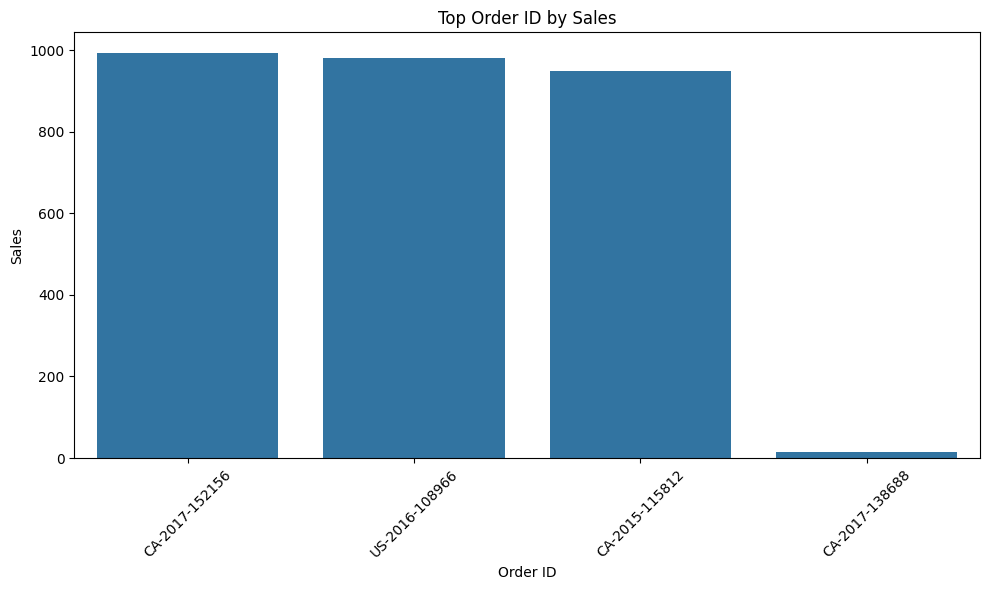

In [9]:
numeric_cols = df.select_dtypes("number").columns.tolist()
categorical_cols = df.select_dtypes("object").columns.tolist()

if numeric_cols and categorical_cols:
    x_col = categorical_cols[0]
    y_col = numeric_cols[0]
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=x_col, y=y_col, data=df.groupby(x_col)[y_col].sum().reset_index().sort_values(by=y_col, ascending=False).head(10))
    plt.title(f"Top {x_col} by {y_col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Suitable columns not found for bar chart.")
